# Enclosure Experiments

## Acoustic Engineering 2024-2025

Zat Pros - zat.pros01@estudiant.upf.edu, Office 55.312
__<p>28<sup>th</sup> OCTOBER 2024<p>__

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

import scipy
from scipy.io.wavfile import read
from scipy.io.wavfile import write
from scipy.fft import fft
from scipy import signal as signal

import soundfile as sf

/var/folders/k3/348v33yx5lqd30gcv72z1ty80000gn/T/ipykernel_2462/659633092.py:11: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, x = read(file)


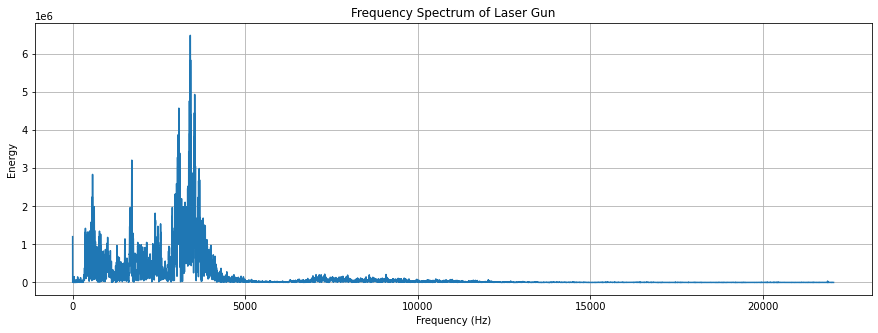

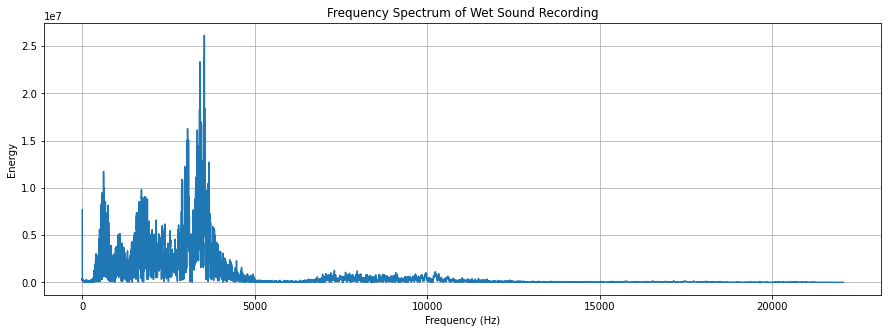

In [25]:
# functions used in the whole lab
def read_sound(file):
  """ read a mono wav sound file, assuming is mono, and convert it to a floating point array
    Args:
      file (str): File name
    Returns:
      sound_array (numpy.array): Array of samples as floating point values between -1 and 1
      sampling_rate (int): Sampling rate
  """
  # read sound file
  sampling_rate, x = read(file)
  # convert to floating point values between -1 and 1, assuming x are 16 bit integers
  sound_array = np.float32(x) / 2**15
  sound_array = sound_array.sum(axis=1) / 2
  return sound_array, sampling_rate

def FFTvisualize(xx, Nfft, fs, title="Frequency Spectrum"):
    """
    Visualizes the FFT of an audio signal.
    Args:
        xx (numpy.array): Audio signal array.
        Nfft (int): Number of points for the FFT.
        fs (int): Sampling rate of the audio signal.
        title (str): Title for the plot.
    """
    zz = np.abs(np.fft.fft(xx, n=Nfft))
    xf = np.linspace(0, fs, Nfft)

    plt.figure(figsize=(15, 5))
    plt.plot(xf[:Nfft // 2], zz[:Nfft // 2])
    plt.grid()
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Energy')
    plt.show()



x, fs = read_sound('../Enclosure_Comparison/Audios/audios_zoom/tube_enclosure_zoom.wav')
y, fs = read_sound('../Enclosure_Comparison/Audios/audios_zoom_echo/tube_enclosure_zoom_echo.wav')


FFTvisualize(x, len(x), fs, "Frequency Spectrum of Laser Gun")
ipd.display(ipd.Audio(data=x, rate=fs))

FFTvisualize(y, len(y), fs, "Frequency Spectrum of Wet Sound Recording")
ipd.display(ipd.Audio(data=y, rate=fs))

109809
153909


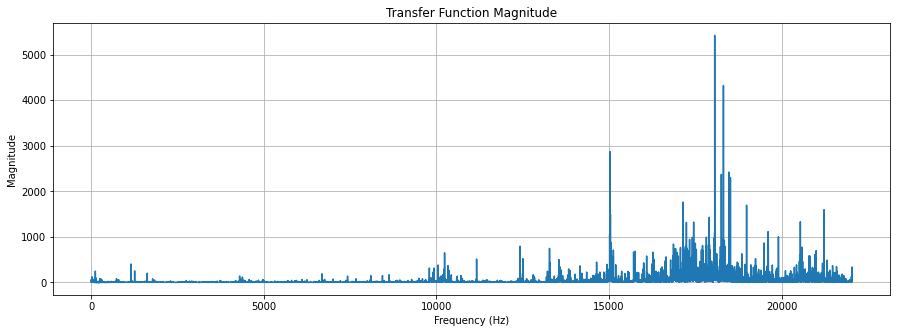

In [26]:
min_length = min(len(x), len(y))
print(len(x))
print(len(y))
x = x[:min_length]
y = y[:min_length]

X_f = np.fft.fft(x)  # Compute FFT
X_f_magnitude = np.abs(X_f)  # Magnitude of FFT

Y_f = np.fft.fft(y)  # Compute FFT
Y_f_magnitude = np.abs(Y_f)  # Magnitude of FFT

H_f = Y_f / X_f  # Transfer function

H_f_magnitude = np.abs(H_f)  # Magnitude of transfer function

# Print the transfer function magnitude
frequencies = np.fft.fftfreq(len(H_f), d=1/fs)  # Frequency bins
plt.figure(figsize=(15, 5))
plt.plot(frequencies[:len(frequencies)//2], H_f_magnitude[:len(H_f_magnitude)//2])
plt.grid()
plt.title('Transfer Function Magnitude')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()


In [ ]:
# Compute the impulse response h(t) using the inverse Fourier Transform
h_t = np.fft.ifft(H_f)  # Inverse FFT to obtain impulse response
h_t_real = np.real(h_t)  # Take the real part if necessary

# Time vector for impulse response
t = np.arange(len(h_t_real)) / fs  # Time vector

# Visualize the impulse response
plt.figure(figsize=(15, 5))
plt.plot(t, h_t_real)
plt.title('Impulse Response h(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim(0, 2.5)  # Limit x-axis to a specific range for better visibility
plt.show()


ipd.display(ipd.Audio(data=np.int16(h_t_real / np.max(np.abs(h_t_real)) * 32767), rate=fs))

Length of dry signal (x): 109809
Length of impulse response (h): 109809
Length of filtered output (full convolution): 219617


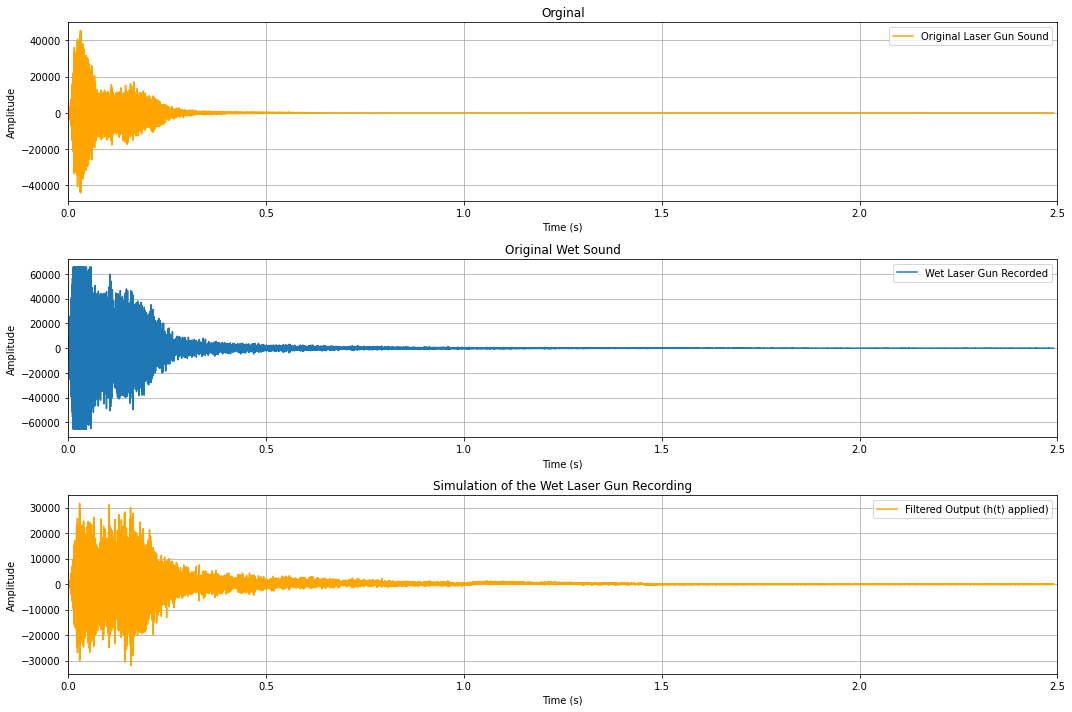

Original Laser Gun Sound


Original Wet Laser Gun Recorded


Simulation of the Wet Laser Gun Recording


In [ ]:
# Apply the computed impulse response as a filter to the dry sound x(t) using convolution
filtered_output_full = np.convolve(x, h_t_real, mode='full')  # Use 'full' to capture the entire response

# Print the lengths to verify
print(f"Length of dry signal (x): {len(x)}")
print(f"Length of impulse response (h): {len(h_t_real)}")
print(f"Length of filtered output (full convolution): {len(filtered_output_full)}")

# Use only the first len(x) samples if necessary
filtered_output_full = filtered_output_full[:len(x)]  # Keep the same length as the original signal

# Visualize the filtered output and the wet sound for comparison
plt.figure(figsize=(15, 10))

# Plot  wet sound

# Plot filtered output
plt.subplot(3, 1, 1)
plt.plot(np.arange(len(x)) / fs, x, label='Original Laser Gun Sound', color='orange')
plt.title('Orginal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim(0, 2.5)  # Limit x-axis for better visibility
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(np.arange(len(y)) / fs, y, label='Wet Laser Gun Recorded')
plt.title('Original Wet Sound')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim(0, 2.5)  # Limit x-axis for better visibility
plt.legend()

# Plot filtered output
plt.subplot(3, 1, 3)
plt.plot(np.arange(len(filtered_output_full)) / fs, filtered_output_full, label='Filtered Output (h(t) applied)', color='orange')
plt.title('Simulation of the Wet Laser Gun Recording')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim(0, 2.5)  # Limit x-axis for better visibility
plt.legend()

plt.tight_layout()
plt.show()

# Save the filtered output to a WAV file if needed
print("Original Laser Gun Sound")
ipd.display(ipd.Audio(data=np.int16(x / np.max(np.abs(x)) * 32767), rate=fs))
print("Original Wet Laser Gun Recorded")
ipd.display(ipd.Audio(data=np.int16(y / np.max(np.abs(y)) * 32767), rate=fs))
print("Simulation of the Wet Laser Gun Recording")
ipd.display(ipd.Audio(data=np.int16(filtered_output_full / np.max(np.abs(filtered_output_full)) * 32767), rate=fs))



# output_directory = "/Users/mariaprosgaznares/Desktop/acoustic-engineering-notebooks/Experiment Templates/Enclosure_Comparison/Screenshots/5. filterd_outputs"  # Specify your directory
# os.makedirs(output_directory, exist_ok=True)  # Create the directory if it doesn't exist
# output_path = os.path.join(output_directory, "filtered_output_stick_tube_zoom.wav")

# write(output_path, fs, np.int16(filtered_output_full / np.max(np.abs(filtered_output_full)) * 32767))
# print(f"Filtered output saved to: {output_path}")


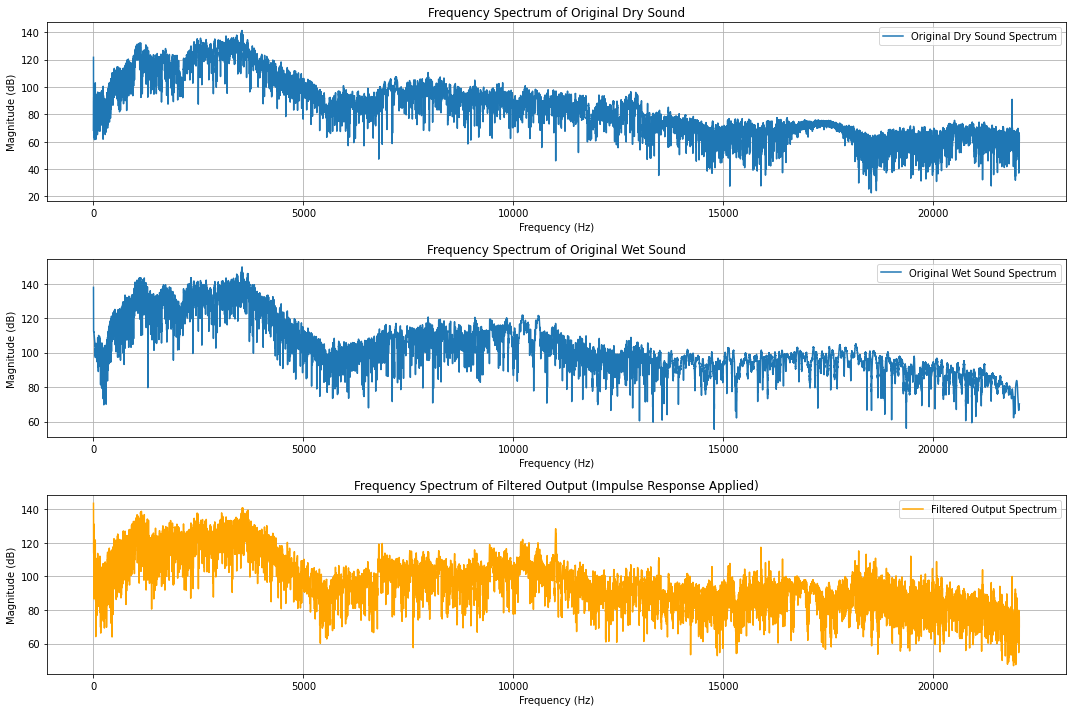

In [ ]:
# Compute and visualize the frequency spectra of the dry wet and filtered sounds

# Perform Fourier Transform on dry sound

X = np.fft.fft(x)
freq_X = np.fft.fftfreq(len(x), 1 / fs)

# Perform Fourier Transform on wet sound
Y_wet = np.fft.fft(y)
freq_wet = np.fft.fftfreq(len(y), 1 / fs)

# Perform Fourier Transform on filtered output
Y_filtered = np.fft.fft(filtered_output_full)
freq_filtered = np.fft.fftfreq(len(filtered_output_full), 1 / fs)

# Plot the magnitude spectrum for both signals
plt.figure(figsize=(15, 10))

# Plot spectrum of the wet sound
plt.subplot(3, 1, 1)
plt.plot(freq_X[:len(freq_X)//2], 20 * np.log10(np.abs(X[:len(X)//2])), label='Original Dry Sound Spectrum')
plt.title('Frequency Spectrum of Original Dry Sound')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(freq_wet[:len(freq_wet)//2], 20 * np.log10(np.abs(Y_wet[:len(Y_wet)//2])), label='Original Wet Sound Spectrum')
plt.title('Frequency Spectrum of Original Wet Sound')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.legend()

# Plot spectrum of the filtered output
plt.subplot(3, 1, 3)
plt.plot(freq_filtered[:len(freq_filtered)//2], 20 * np.log10(np.abs(Y_filtered[:len(Y_filtered)//2])), color='orange', label='Filtered Output Spectrum')
plt.title('Frequency Spectrum of Filtered Output (Impulse Response Applied)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
